In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
## conda install -c plotly plotly
## conda install -c conda-forge plotly
import plotly.express as px
import plotly.graph_objects as go
##conda install -c conda-forge fbprophet
from fbprophet import Prophet 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
## To ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [85]:
## Importing dataset and to display 1st 5 lines of dataset we use head 

In [86]:
df = pd.read_csv(r'K:\covid 19 analysis\covid_19_clean_complete.csv',parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [87]:
## Renaming the columns for easy usage

In [88]:
df.rename(columns={'Date': 'date',
                   'Province/State': 'state',
                   'Country/Region':'country',
                   'Lat': 'lat', 'Long': 'long',
                   'Confirmed': 'confirmed',
                   'Deaths': 'deaths',
                   'Recovered': 'recovered'
                    },inplace=True)

In [89]:
## To get the number of active cases

In [90]:
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [91]:
## To show maximum number of active,confirmed and death cases

In [92]:
top = df[df['date'] == df['date'].max()]
world = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41


In [93]:
## Next plotting Number of Active cases 

In [94]:
figure = px.choropleth(world,locations="country",locationmode='country names' 
                       ,color="active",hover_name="country",range_color=[1,1000],
                      color_continuous_scale="Peach",title="Countries with Active Cases")
figure.show()

In [95]:
## To show increase in daily cases using graph

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Cases')]

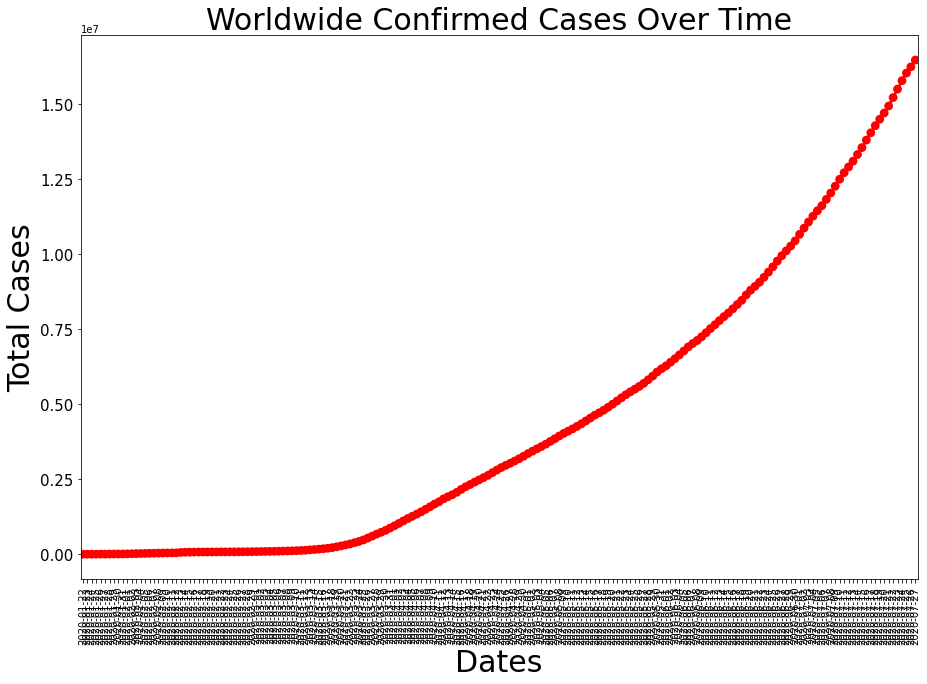

In [96]:
#CONFIRMED CASES
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby('date')['date','confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])
a = sns.pointplot(x = total_cases.date.dt.date,y=total_cases.confirmed,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

In [97]:
## Top 20 countries having most active cases

In [98]:
top_actives= top.groupby(by='country')['active'].sum().sort_values(ascending=False).reset_index().head(20)

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

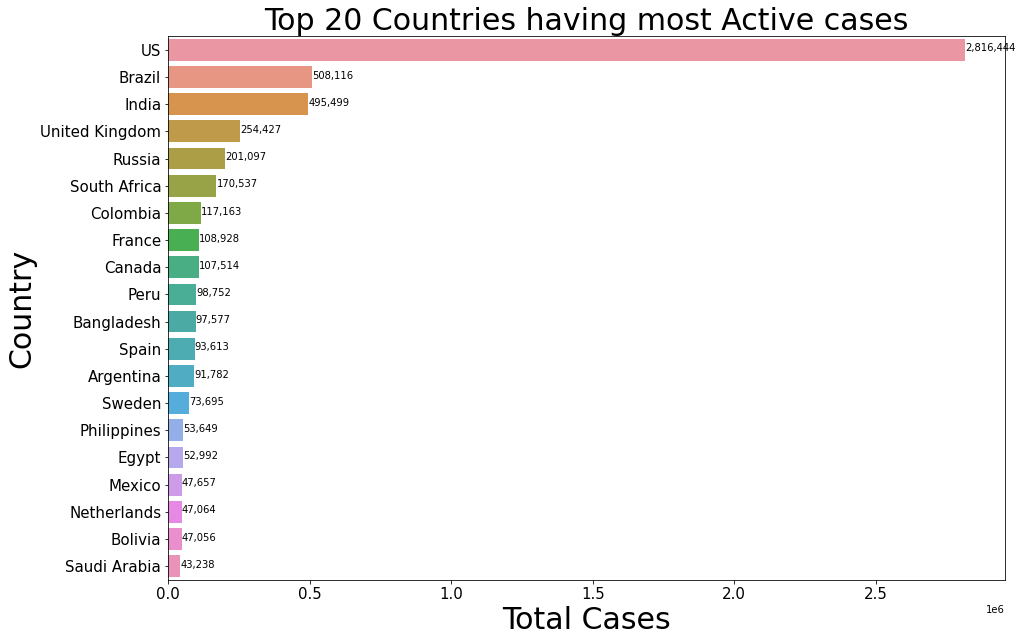

In [99]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Active cases",fontsize=30)
ax = sns.barplot(x=top_actives.active,y=top_actives.country)
for i, (value,name) in enumerate(zip(top_actives.active,top_actives.country)):
    ax.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
ax.set(xlabel="Total Cases",ylabel="Country")

In [100]:
## Top 20 countries having most death cases

In [101]:
top_deaths= top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).reset_index().head(20)

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

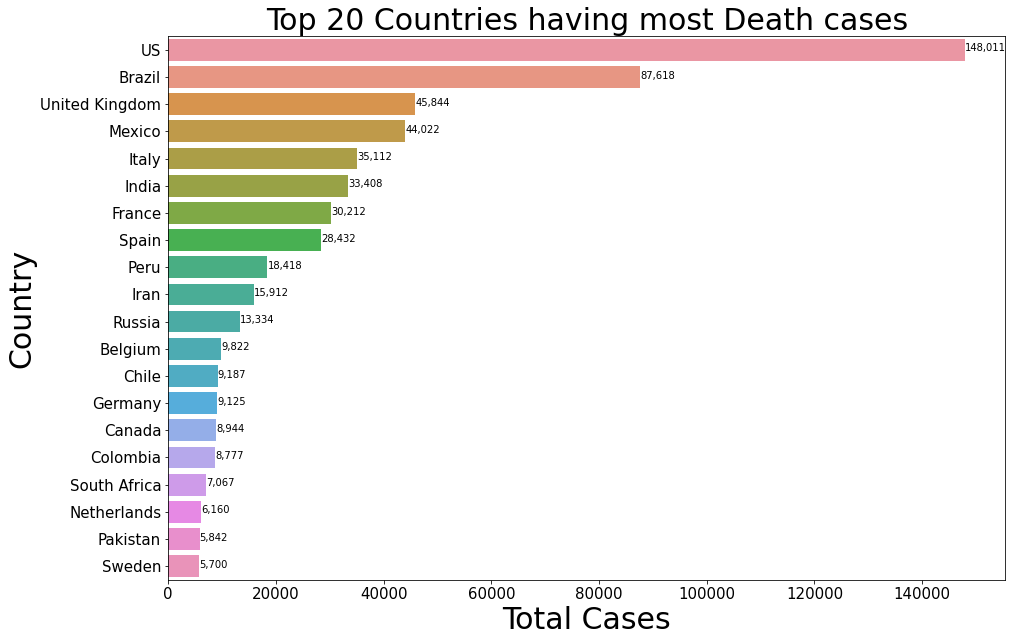

In [102]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths,y=top_deaths.country)
for i, (value,name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
ax.set(xlabel="Total Cases",ylabel="Country")

In [103]:
## Top 20 recovery countries

In [104]:
recovery=top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
recovery

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


In [105]:
## To show china vs us vs italy vs india

In [106]:
china = df[df.country == 'China']
china = china.groupby(by='date')['recovered','active','confirmed','deaths'].sum().reset_index()

In [107]:
us = df[df.country == 'US']
us = us.groupby(by='date')['recovered','active','confirmed','deaths'].sum().reset_index()
us=us.iloc[33:].reset_index().drop('index',axis=1)

In [108]:
italy = df[df.country == 'Italy']
italy = italy.groupby(by='date')['recovered','active','confirmed','deaths'].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop('index',axis=1)

In [109]:
india = df[df.country == 'India']
india = india.groupby(by='date')['recovered','active','confirmed','deaths'].sum().reset_index()
india=india.iloc[8:].reset_index().drop('index',axis=1)

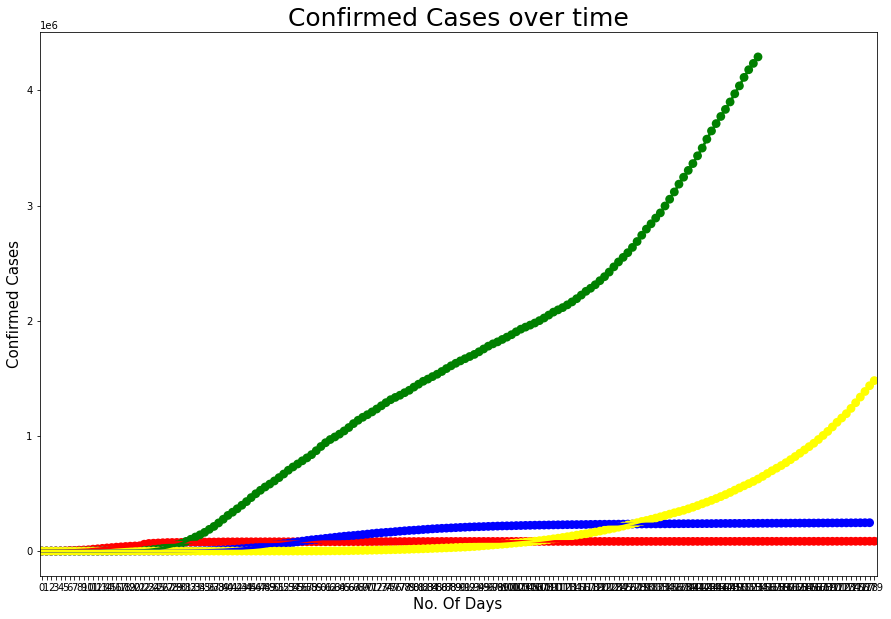

In [110]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.confirmed,color="Red")
sns.pointplot(us.index,us.confirmed,color="Green")
sns.pointplot(italy.index,italy.confirmed,color="Blue")
sns.pointplot(india.index,india.confirmed,color="Yellow")
plt.title("Confirmed Cases over time", fontsize=25)
plt.ylabel("Confirmed Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

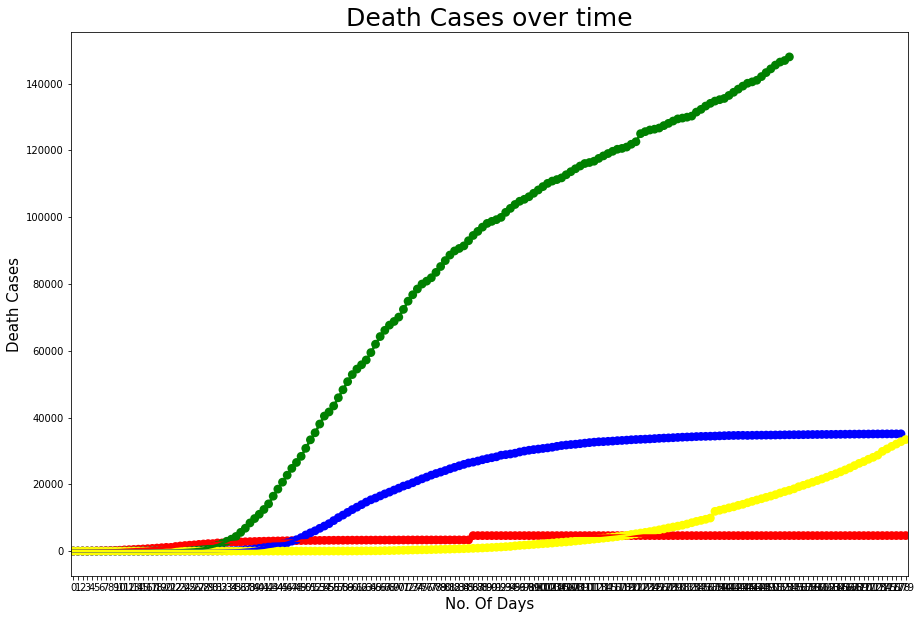

In [111]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.deaths,color="Red")
sns.pointplot(us.index,us.deaths,color="Green")
sns.pointplot(italy.index,italy.deaths,color="Blue")
sns.pointplot(india.index,india.deaths,color="Yellow")
plt.title("Death Cases over time", fontsize=25)
plt.ylabel("Death Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

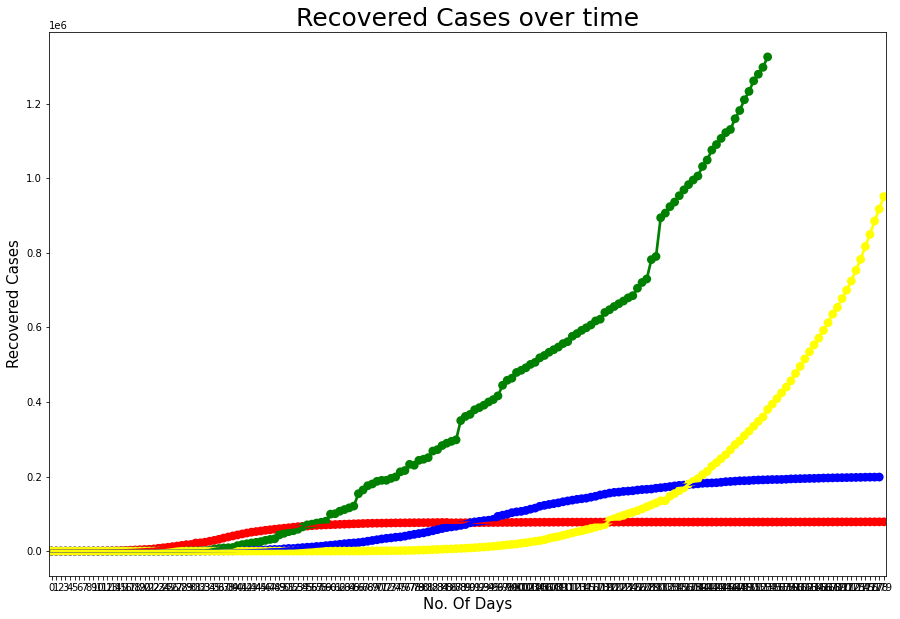

In [112]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.recovered,color="Red")
sns.pointplot(us.index,us.recovered,color="Green")
sns.pointplot(italy.index,italy.recovered,color="Blue")
sns.pointplot(india.index,india.recovered,color="Yellow")
plt.title("Recovered Cases over time", fontsize=25)
plt.ylabel("Recovered Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

In [113]:
confirmed = df.groupby('date').sum()['confirmed'].reset_index()
deaths = df.groupby('date').sum()['deaths'].reset_index()
recovered = df.groupby('date').sum()['recovered'].reset_index()
active = df.groupby('date').sum()['active'].reset_index()


In [114]:
confirmed.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [115]:
deaths.head()

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [116]:
recovered.head()

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [117]:
active.head()

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


In [118]:
## To clear the keyerror which may occur below we have to type 
## conda install pystan=2.19.0.0
## conda install -c conda-forge fbprophet=0.6.0    in Anaconda prompt 

In [119]:
## confirmed cases worldwide

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


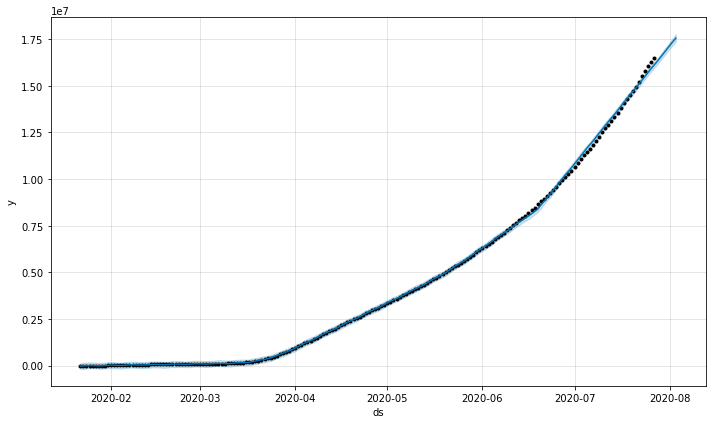

In [120]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(confirmed)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(confirmed.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made


metric_df.dropna(inplace=True)
#print(metric_df)


confirmed_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

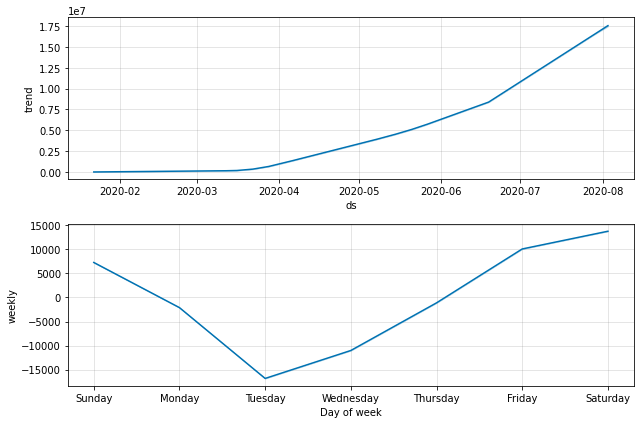

In [121]:
confirmed_forecast_plot = m.plot_components(forecast)

In [122]:
r2_score(metric_df.y, metric_df.yhat)

0.999698273701451

In [123]:
mean_squared_error(metric_df.y, metric_df.yhat)

6794283524.149588

In [124]:
mean_absolute_error(metric_df.y, metric_df.yhat)

42563.944663345326

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


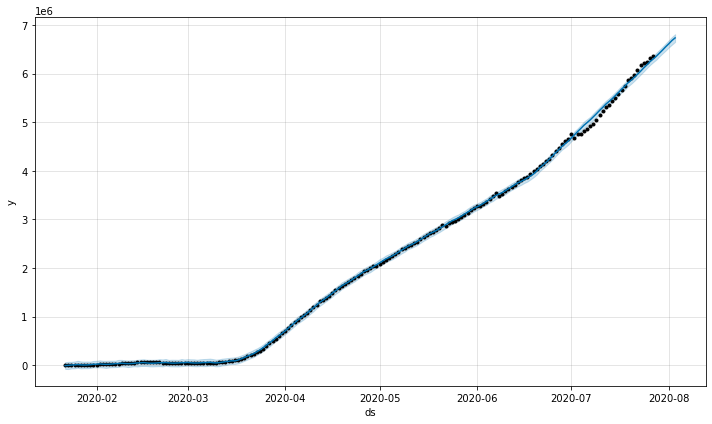

In [125]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
active.columns = ['ds','y']
active['ds'] = pd.to_datetime(active['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(active)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(active.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

active_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

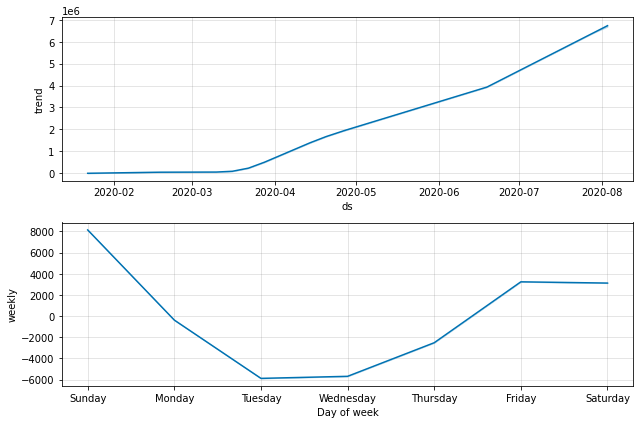

In [126]:
active_forecast_plot = m.plot_components(forecast)

In [127]:
r2_score(metric_df.y, metric_df.yhat)

0.9996703177239858

In [128]:
mean_squared_error(metric_df.y, metric_df.yhat)

1272232529.408621

In [129]:
mean_absolute_error(metric_df.y, metric_df.yhat)

21278.76548266945

In [130]:
## Recovered cases worldwide

In [ ]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(recovered)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(recovered.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

recovered_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
recovered_forecast_plot = m.plot_components(forecast)

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

In [ ]:
## Death cases worldwide

In [ ]:
#renaming columns 
# prophet need two columns for prediction (ds-date,y-that we want to predict)
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])  ## convert to datetime
m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(deaths)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
#future.tail()                 # print last 5 days

forecast = m.predict(future)

forecast.head()  ## data of prediction
metric_df=forecast.set_index('ds')[['yhat']].join(deaths.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction

metric_df.dropna(inplace=True)
#print(metric_df)

deaths_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases
# black dot - actual values
# blue line = predicted values

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

In [ ]:
## confirmed cases in India

In [ ]:
df_india = df.query('country=="India"')
#df_india.head()
df_india = df.query('country=="India"').groupby('date')[['confirmed','deaths','recovered','active']].sum().reset_index()
india_confirmed,india_deaths,india_recovered,india_active = df_india[['date','confirmed']],df_india[['date','deaths']],df_india[['date','recovered']],df_india[['date','active']]

In [ ]:
india_confirmed.columns = ['ds','y']
india_confirmed['ds'] = pd.to_datetime(india_confirmed['ds']) 
#india_confirmed.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_confirmed)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_confirmed.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_confirmed_forecast_plot = m.plot(forecast)  # ploting predicted value of confirmed cases

In [ ]:
india_confirmed_forecast_plot = m.plot_components(forecast)

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

In [ ]:
## Active cases in India

In [ ]:
india_active.columns = ['ds','y']
india_active['ds'] = pd.to_datetime(india_active['ds']) 

#india_active.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_active)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
metric_df=forecast.set_index('ds')[['yhat']].join(india_active.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_active_forecast_plot = m.plot(forecast)  # ploting predicted value of active cases

In [ ]:
india_active_forecast_plot = m.plot_components(forecast)

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

In [ ]:
## Recovered cases in India

In [ ]:
india_recovered.columns = ['ds','y']
india_recovered['ds'] = pd.to_datetime(india_recovered['ds']) 
#india_recovered.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_recovered)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_recovered.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_recover_forecast_plot = m.plot(forecast)  # ploting predicted value of recover cases

In [ ]:
india_recover_forecast_plot = m.plot_components(forecast)

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)

In [ ]:
## Death cases in India

In [ ]:
india_deaths.columns = ['ds','y']
india_deaths['ds'] = pd.to_datetime(india_deaths['ds']) 
#india_deaths.head()

m = Prophet(interval_width=0.95)   ## making a model of prophet with accuracy 95$
m.fit(india_deaths)                  ## applyying data to model
future = m.make_future_dataframe(periods=7)  ## making furure prediction for next 7 days
future.tail()                 # print last 5 days

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

metric_df=forecast.set_index('ds')[['yhat']].join(india_deaths.set_index('ds').y).reset_index()

# ds - date
# yhat - prediction made
# yhat_lower - lower limit of prediction
# yhoat_upper - upper limit of prediction
metric_df.dropna(inplace=True)
#print(metric_df)

india_deaths_forecast_plot = m.plot(forecast)  # ploting predicted value of death cases

In [ ]:
india_deaths_forecast_plot = m.plot_components(forecast)

In [ ]:
r2_score(metric_df.y, metric_df.yhat)

In [ ]:
mean_squared_error(metric_df.y, metric_df.yhat)

In [ ]:
mean_absolute_error(metric_df.y, metric_df.yhat)